First 5 rows of training data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3734

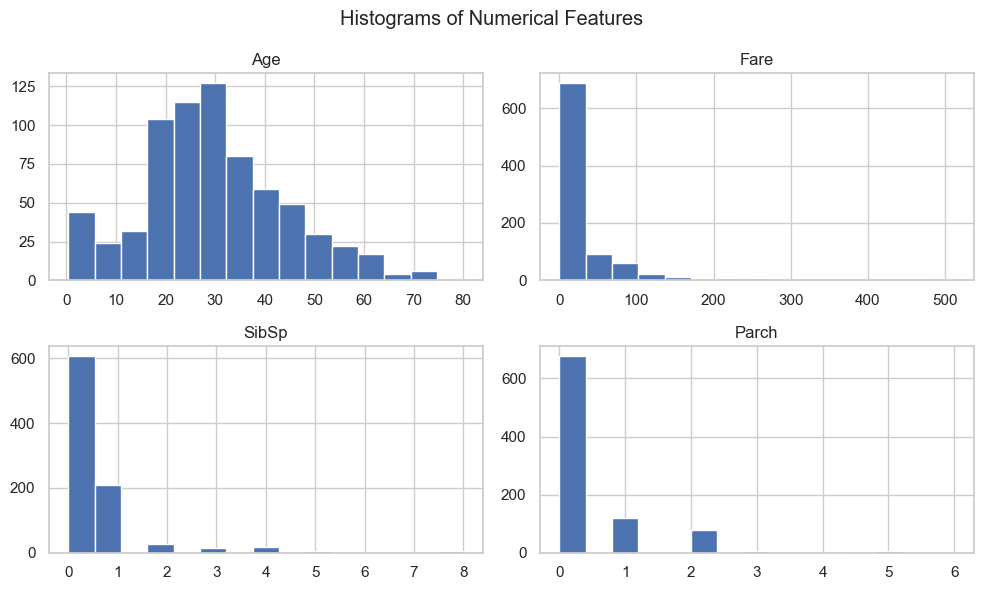

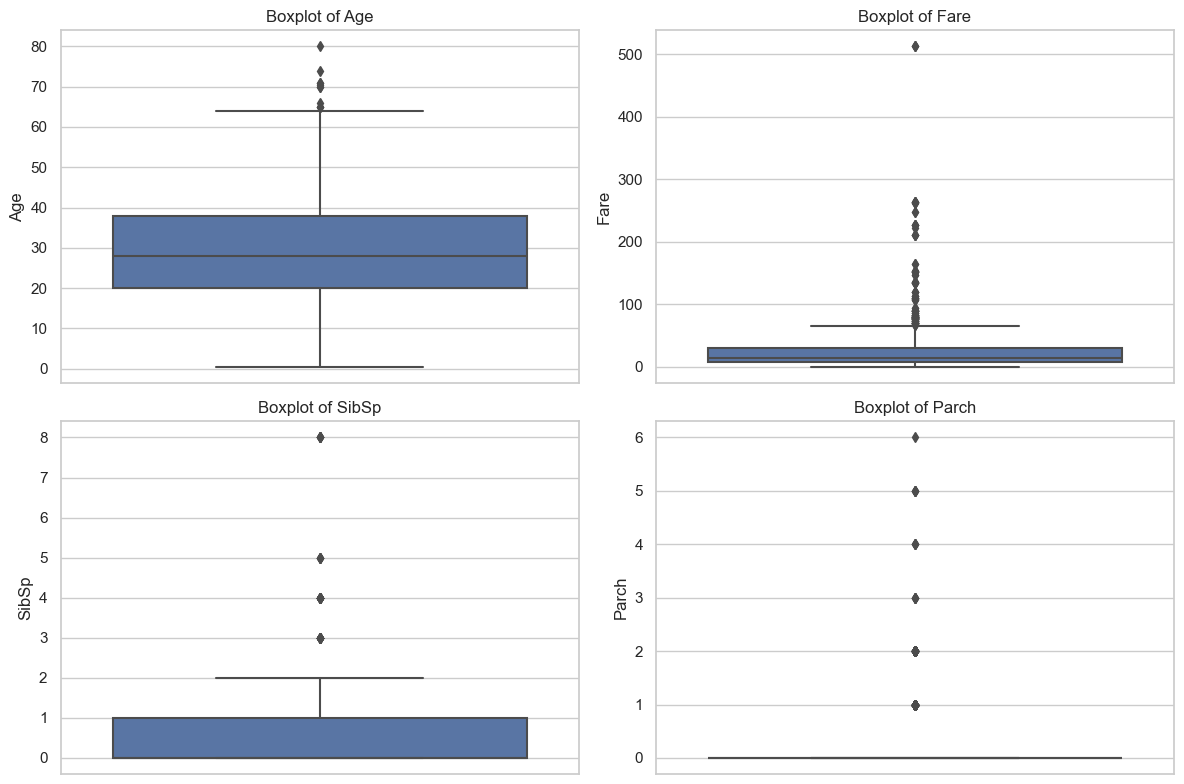

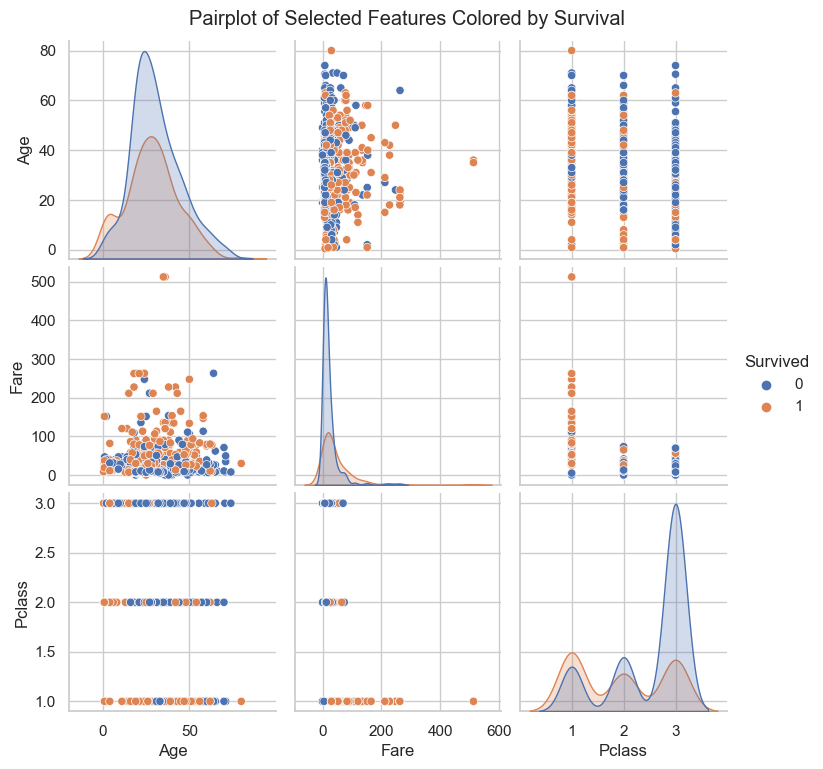

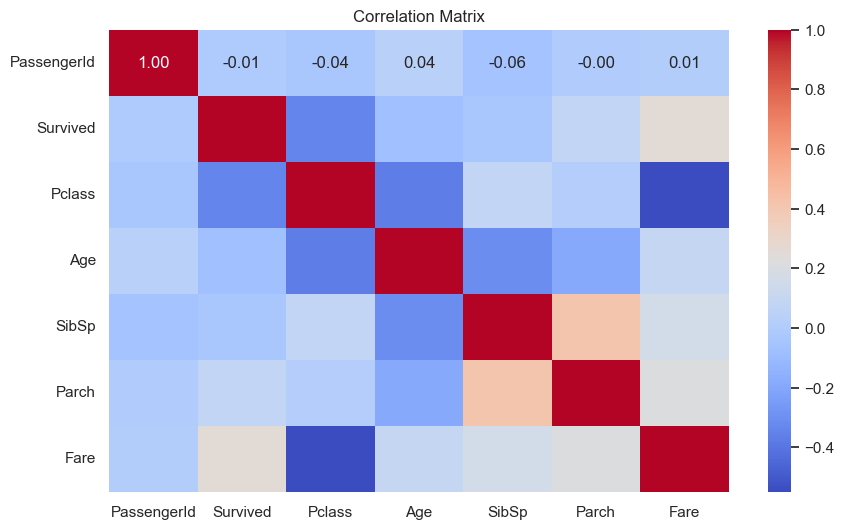

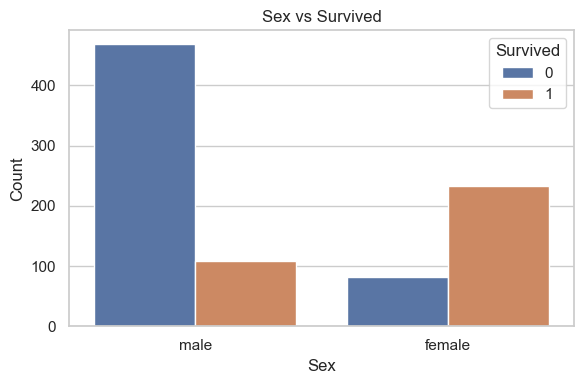

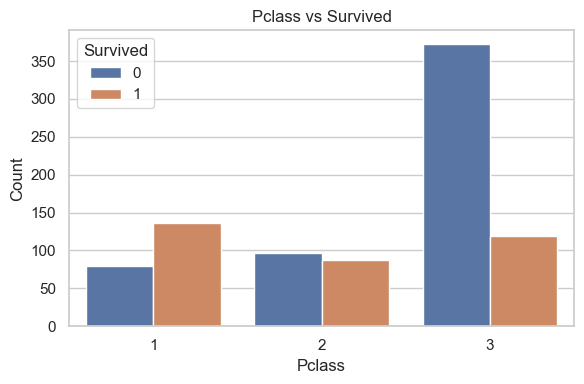

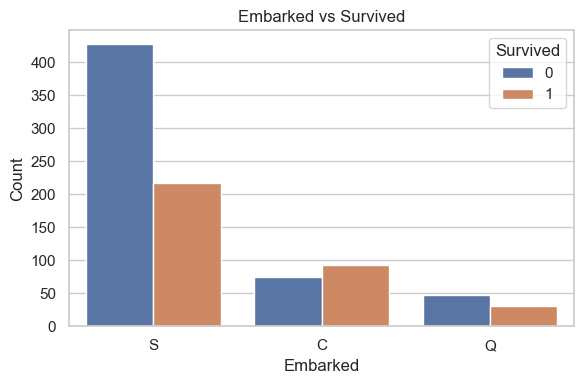

In [11]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Titanic Dataset
train = pd.read_csv('Titanic_train.csv')
test = pd.read_csv('Titanic_test.csv')

# Step 3: View Initial Rows
print("First 5 rows of training data:")
print(train.head())

# Step 4: Dataset Information
print("\n--- Dataset Info ---")
print(train.info())

# Step 5: Summary Statistics
print("\n--- Summary Statistics ---")
print(train.describe(include='all'))

# Step 6: Check for Missing Values
print("\n--- Missing Values ---")
print(train.isnull().sum())

# Step 7: Histograms of Numerical Features
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
train[numerical_features].hist(bins=15, figsize=(10, 6), layout=(2, 2))
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout()
plt.show()

# Step 8: Boxplots to Check Distributions
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=train, y=feature)
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

# Step 9: Pairplot (check correlation with Survived)
# Convert Survived to categorical for hue
train['Survived'] = train['Survived'].astype(str)
sns.pairplot(train[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived')
plt.suptitle("Pairplot of Selected Features Colored by Survival", y=1.02)
plt.show()

# Step 10: Correlation Heatmap (only numeric columns)
# Convert Survived back to numeric for correlation
train['Survived'] = train['Survived'].astype(int)
plt.figure(figsize=(10, 6))
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Step 11: Countplots for Categorical Features
# Convert Survived to string again for hue in plots
train['Survived'] = train['Survived'].astype(str)

categorical_features = ['Sex', 'Pclass', 'Embarked']
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=train, x=feature, hue='Survived')
    plt.title(f'{feature} vs Survived')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Survived')
    plt.tight_layout()
    plt.show()

# Optional: Convert 'Survived' back to int for future modeling
train['Survived'] = train['Survived'].astype(int)


In [15]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load the Titanic training dataset
train = pd.read_csv('Titanic_train.csv')

# a. Handle Missing Values

# Check missing values before handling
print("\n--- Missing Values Before ---")
print(train.isnull().sum())

# Impute 'Age' with median
age_imputer = SimpleImputer(strategy='median')
train['Age'] = age_imputer.fit_transform(train[['Age']])

# Impute 'Embarked' with most frequent
embarked_imputer = SimpleImputer(strategy='most_frequent')
train['Embarked'] = embarked_imputer.fit_transform(train[['Embarked']])

# If 'Cabin' exists, we can drop it due to high missing rate
if 'Cabin' in train.columns:
    train.drop(columns='Cabin', inplace=True)

# Drop 'Ticket' and 'Name' as they’re not useful for modeling
train.drop(columns=['Ticket', 'Name'], inplace=True)

# Verify missing values after handling
print("\n--- Missing Values After ---")
print(train.isnull().sum())

# b. Encode Categorical Variables

# Convert 'Sex' and 'Embarked' using Label Encoding
label_enc = LabelEncoder()

train['Sex'] = label_enc.fit_transform(train['Sex'])          # male=1, female=0
train['Embarked'] = label_enc.fit_transform(train['Embarked'])  # C=0, Q=1, S=2 (may vary)

# Confirm encoding
print("\n--- Encoded Categorical Features (sample) ---")
print(train[['Sex', 'Embarked']].head())

# Final dataset structure
print("\n--- Final Dataset Columns ---")
print(train.columns)



--- Missing Values Before ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

--- Missing Values After ---
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

--- Encoded Categorical Features (sample) ---
   Sex  Embarked
0    1         2
1    0         0
2    0         2
3    0         2
4    1         2

--- Final Dataset Columns ---
Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')


In [23]:
# Step 1: Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Define Features (X) and Target (y)
# Drop 'PassengerId' and target column
X = train.drop(columns=['PassengerId', 'Survived'])
y = train['Survived']

# Step 3: Split the Data (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Initialize and Train the Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)  # increase max_iter in case of convergence warning
log_reg.fit(X_train, y_train)
# Save the trained model to a file
import joblib
joblib.dump(log_reg, 'logistic_model.pkl')


# Step 5: Predict on Validation Set
y_pred = log_reg.predict(X_val)

# Step 6: Evaluate Model Performance
print("\n--- Accuracy Score ---")
print(accuracy_score(y_val, y_pred))

print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_val, y_pred))

print("\n--- Classification Report ---")
print(classification_report(y_val, y_pred))



--- Accuracy Score ---
0.8044692737430168

--- Confusion Matrix ---
[[98 12]
 [23 46]]

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179




--- Evaluation Metrics ---
Accuracy:  0.8045
Precision: 0.7931
Recall:    0.6667
F1-score:  0.7244
ROC AUC:   0.8522


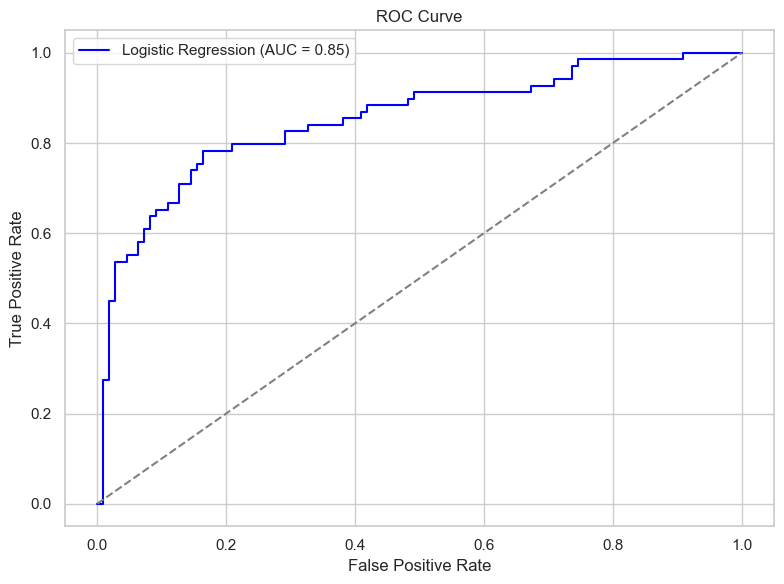

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 1: Predict Probabilities for ROC-AUC
y_prob = log_reg.predict_proba(X_val)[:, 1]  # probability of class 1 (Survived)

# Step 2: Predict Class Labels
y_pred = log_reg.predict(X_val)

# Step 3: Evaluate Metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_prob)

# Step 4: Print Evaluation Results
print(f"\n--- Evaluation Metrics ---")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")

# Step 5: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



--- Logistic Regression Coefficients and Odds Ratios ---
    Feature  Coefficient  Odds_Ratio
5      Fare     0.002200    1.002203
2       Age    -0.037996    0.962717
4     Parch    -0.086746    0.916910
6  Embarked    -0.230305    0.794291
3     SibSp    -0.246686    0.781386
0    Pclass    -1.046770    0.351070
1       Sex    -2.589496    0.075058


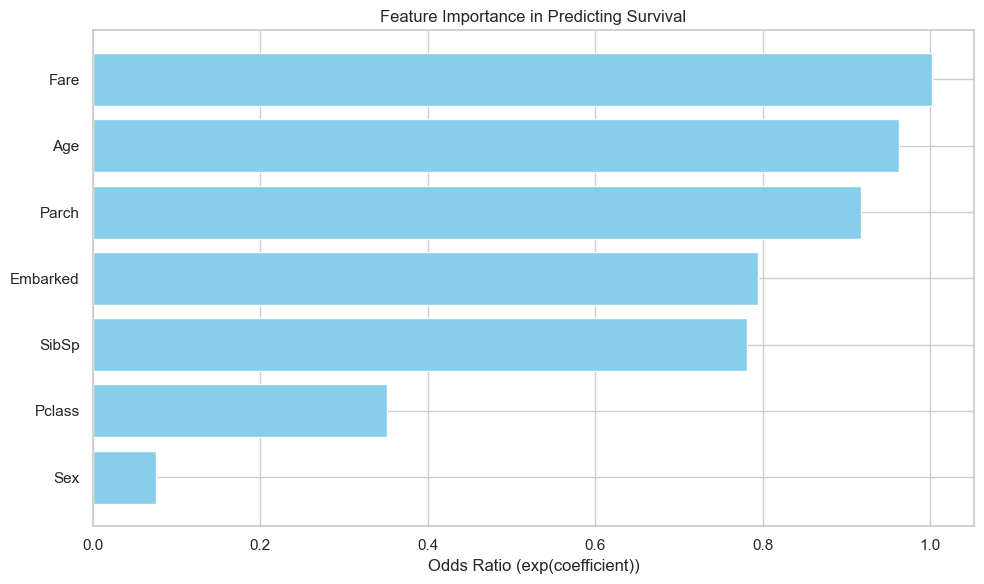

In [21]:
import numpy as np

# Step 1: Get feature names and corresponding coefficients
feature_names = X.columns
coefficients = log_reg.coef_[0]  # since it's binary classification, we get 1 row

# Step 2: Create a DataFrame to display feature importance
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Odds_Ratio': np.exp(coefficients)
}).sort_values(by='Odds_Ratio', ascending=False)

# Step 3: Display the coefficients and odds ratios
print("\n--- Logistic Regression Coefficients and Odds Ratios ---")
print(coef_df)

# Optional: Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Odds_Ratio'], color='skyblue')
plt.xlabel("Odds Ratio (exp(coefficient))")
plt.title("Feature Importance in Predicting Survival")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()
